In [ ]:
# Kaggle - Booking status prediction
# using Logistic Regression with PCA

In [ ]:
import numpy as np
import pandas as pd
df_test = pd.read_csv('/content/test.csv')
df_train = pd.read_csv('/content/train.csv')

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28068 entries, 0 to 28067
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    28068 non-null  int64  
 1   no_of_adults                          28068 non-null  int64  
 2   no_of_children                        28068 non-null  int64  
 3   no_of_weekend_nights                  28068 non-null  int64  
 4   no_of_week_nights                     28068 non-null  int64  
 5   type_of_meal_plan                     28068 non-null  int64  
 6   required_car_parking_space            28068 non-null  int64  
 7   room_type_reserved                    28068 non-null  int64  
 8   lead_time                             28068 non-null  int64  
 9   arrival_year                          28068 non-null  int64  
 10  arrival_month                         28068 non-null  int64  
 11  arrival_date   

In [ ]:
df_train.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
df_train['type_of_meal_plan'].value_counts()

0    35463
2     3421
1     3210
3        6
Name: type_of_meal_plan, dtype: int64

In [ ]:
df_train['required_car_parking_space'].value_counts()

0    41037
1     1063
Name: required_car_parking_space, dtype: int64

In [ ]:
df_train.drop('id', axis=1, inplace=True)

In [ ]:

import matplotlib.pyplot as plt 
import seaborn as sns


<AxesSubplot:>

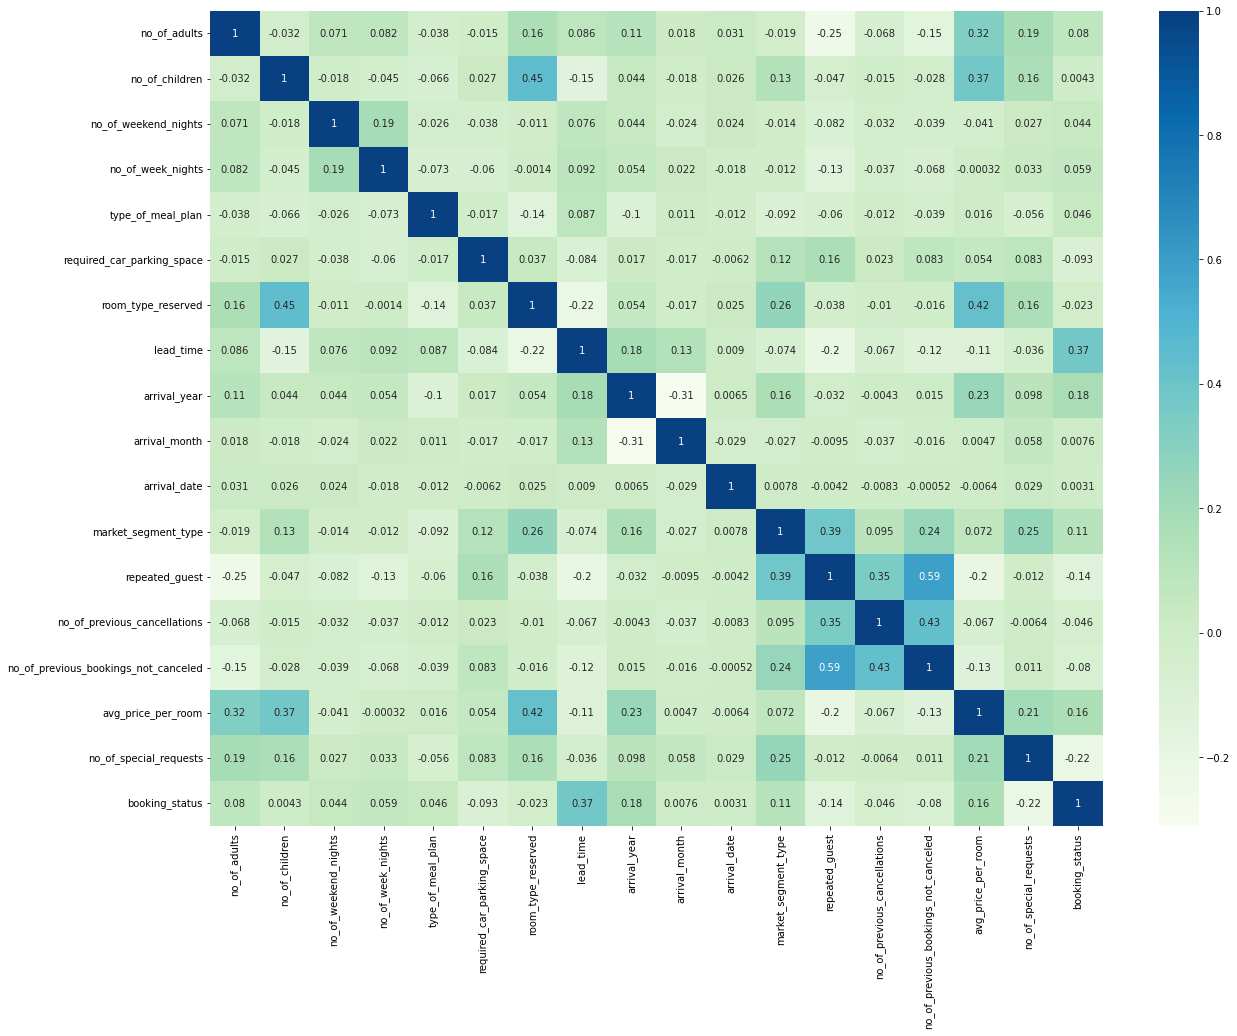

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(), annot= True, cmap='GnBu')

In [ ]:
df_train.drop(['arrival_date', 'no_of_children', 'arrival_month'], axis=1, inplace=True)

In [ ]:
df_test.drop(['no_of_children','arrival_month','arrival_date'], axis=1, inplace=True)

<AxesSubplot:>

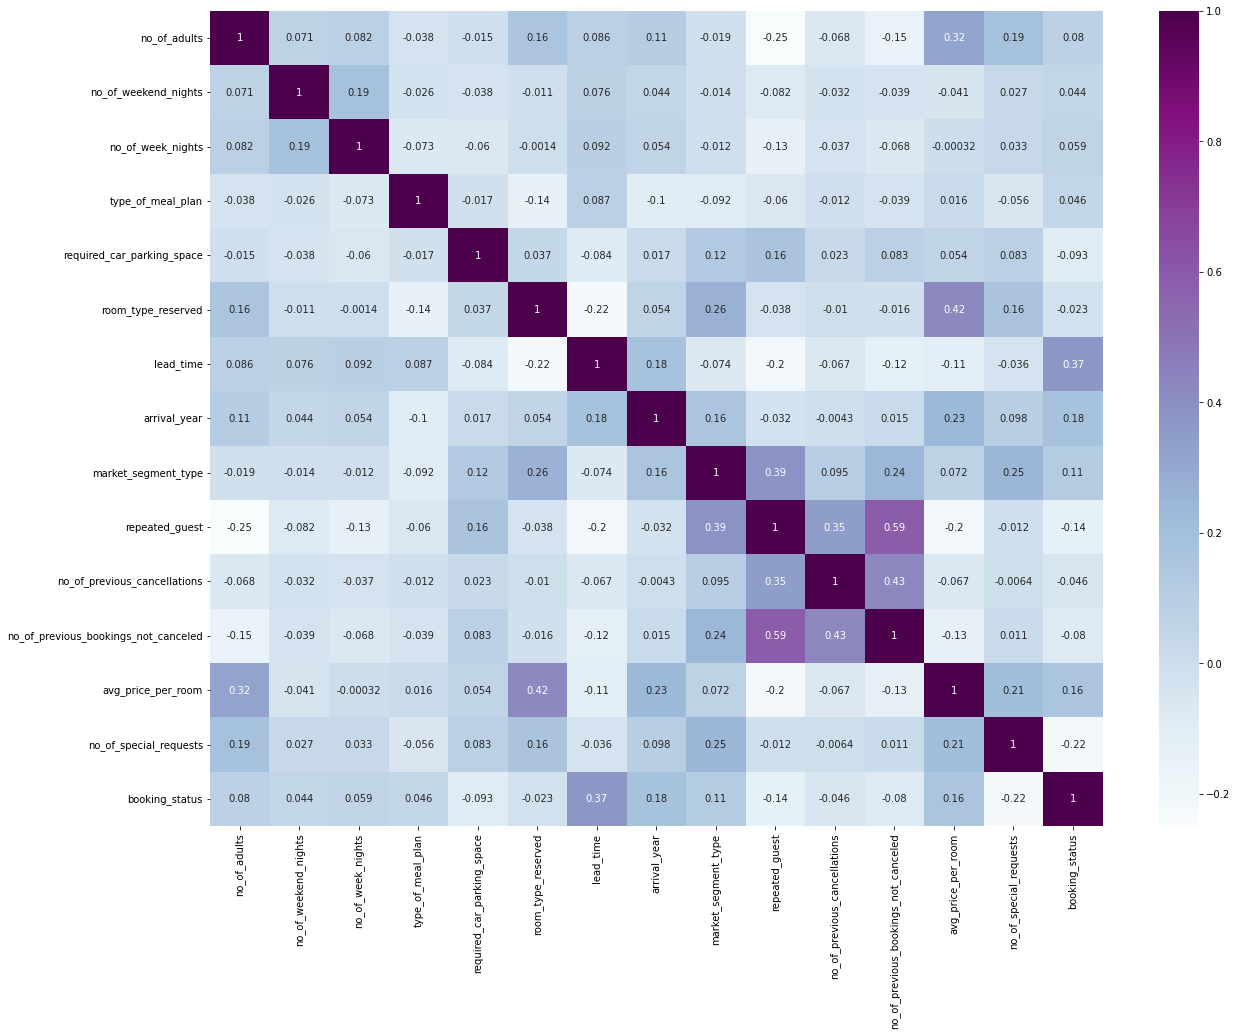

In [ ]:

plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(), annot= True, cmap='BuPu')

In [ ]:
y = df_train['booking_status']
X = df_train.drop ('booking_status', axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.2, random_state=1)
sc = StandardScaler()
sc.fit(X)
sc_data = sc.transform(X)
sc_data
clf = LogisticRegression(max_iter=10000)
clf.fit(X, y)

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(sc_data)
x_pca = pca.transform(sc_data)
sc_data.shape

(42100, 14)

In [ ]:
x_pca.shape


(42100, 7)

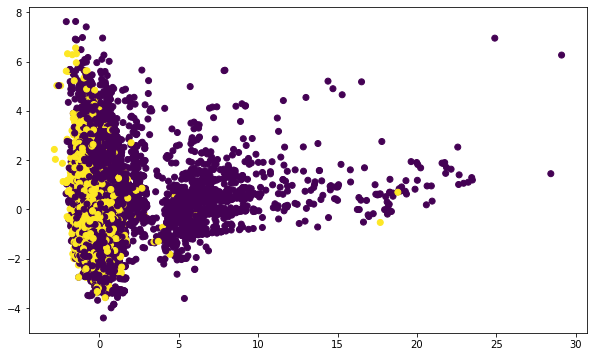

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x_pca[:,0], x_pca[:,1], c = df_train["booking_status"])


In [ ]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
y_pred.size


8420

In [ ]:
y_test

37633    0
24516    0
31459    1
24091    0
13874    0
        ..
22766    0
36501    0
37436    1
463      1
34412    1
Name: booking_status, Length: 8420, dtype: int64

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4283,  822],
       [1162, 2153]])

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7643705463182898
